# [Santander Customer Satisfaction](https://www.kaggle.com/c/santander-customer-satisfaction)
Which customers are happy customers?

最前線のサポートチームから経営幹部まで、顧客満足度は成功の主要な指標です。サービスに不満足な顧客はすぐに離れてしまいます。 さらに、不満足な顧客は離れる前に不満を表明することはめったにありません。

サンタンデール銀行は、kaggkersにサービス提供の早い段階で不満のある顧客を特定する手助けをするよう求めています。 そうすることで、サンタンデールは手遅れになる前に、顧客の満足度を改善するための予防的な措置を講じることができます。

このコンペティションでは、何百もの匿名化された特徴量を使用して、顧客が銀行のサービスに満足しているか、または満足していないかを予測します。

## データについて

- 説明変数
    - 370の数値変数
    - それぞれの説明変数が何を表しているか分からない
    
- 目的変数
    - 1 - サービスに満足な顧客
    - 0 - サービスに不満足な顧客

## 評価について
テストセット内の各顧客が満足していない顧客である確率を予測する。
予測した確率とターゲットのAUCで評価される。

提出ファイルの形式は以下の通り。

ID,TARGET\
2,0\
5,0\
6,0\
etc.

参照したNotebook
# [Exploring features](https://www.kaggle.com/cast42/exploring-features)

このNotebookの流れ
- 特徴量を絞って見てみる
    - var3: 顧客の国籍
    - num_var4 : 銀行商品の数
    - var38 : 顧客価値？ or 銀行から受けている住宅ローン？
    - var15 : 顧客の年齢
    - saldo_var30
    - var15とvar38
    - var36
    - num_var5
    - var15, var36, logvar38, TARGETの相関関係
- 重要な特徴量を抽出して見てみる
    - var15, ind_var5, ind_var30, num_var5, num_var30,
     num_var42, var36, num_meses_var5_ult3
    - 相関
    - クラスタリング

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


- TARGET==0 満足な顧客
- TARGET==1 不満足な顧客

約4%が不満足な顧客 => 不均衡なデータセット

## var3: 顧客の国籍
(var3 is suspected to be the nationality of the customer)

In [3]:
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

それぞれの数値が国籍を表す。

-999999は国籍不明を表すと思われる。

In [4]:
train.loc[train.var3==-999999].shape

(116, 371)

-999999を最頻値の2に置き換える

In [5]:
train = train.replace(-999999,2)
train.loc[train.var3==-999999].shape

(0, 371)

## 行のゼロの数を数える特徴量を追加する

In [8]:
X = train.iloc[:,:-1]
y = train.TARGET

X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,n0
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0,356
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0,330
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0,341
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0,310
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,320


## num_var4 : 銀行商品の数

According to [dmi3kno](https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223)
num_var4 is the number of products

分布図を作成する

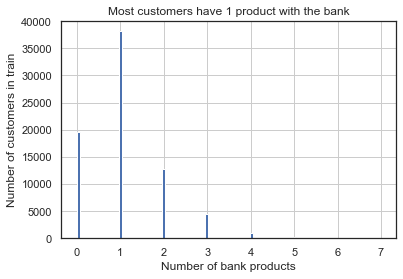

In [9]:
train.num_var4.hist(bins=100)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Most customers have 1 product with the bank')
plt.show()

これを満足/不満足な顧客に分けて見てみる

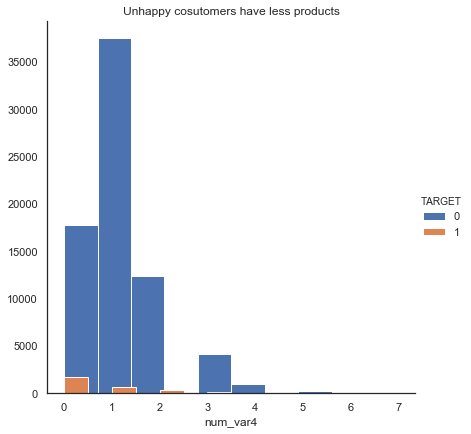

In [10]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Unhappy cosutomers have less products')
plt.show()

不満足な顧客(TARGET==1)のみを表示

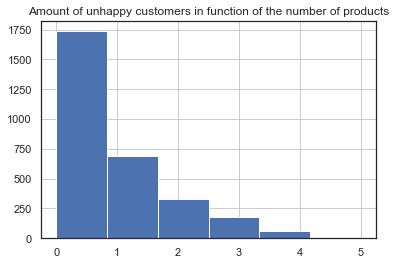

In [11]:
train[train.TARGET==1].num_var4.hist(bins=6)
plt.title('Amount of unhappy customers in function of the number of products');

## var38 : 顧客価値？ or 銀行から受けている住宅ローン？

var38 is important according to XGBOOST see https://www.kaggle.com/cast42/santander-customer-satisfaction/xgboost-with-early-stopping/files

Also RFC thinks var38 is important see https://www.kaggle.com/tks0123456789/santander-customer-satisfaction/data-exploration/notebook

Var38 is suspected to be the mortage value with the bank. If the mortage is with another bank the national average is used. See https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19895/var38-is-mortgage-value

dmi3kno says that var38 is value of the customer: https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223

In [12]:
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

不満足な顧客に絞ると

In [13]:
train.loc[train['TARGET']==1, 'var38'].describe()

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

ヒストグラムを作製

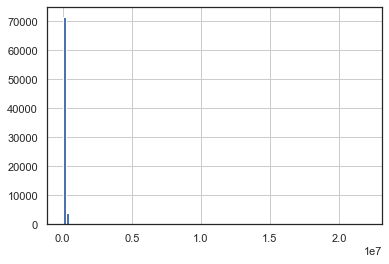

In [20]:
train.var38.hist(bins=100);

対数をとってヒストグラムを作成

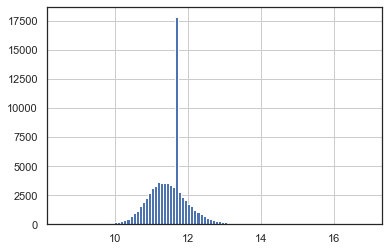

In [21]:
train.var38.map(np.log).hist(bins=100);

11-12の間の突出している値がどこに位置しているのか調べる

In [24]:
train.var38.map(np.log).mode()

0    11.672584
dtype: float64

var38の最頻値を調べる

In [25]:
train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
318211.440000        1
73069.260000         1
36425.370000         1
163515.900000        1
159395.520000        1
Name: var38, Length: 57736, dtype: int64

117310.979016が14868回出現していることが分かる

In [26]:
train.var38[train['var38'] != 117310.979016494].mean()

117217.5333084768

この最頻値は、他の値の平均にとても近い値であることが分かる。

最頻値を抜いてみる

In [27]:
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts()

451931.22    16
463625.16    12
288997.44    11
104563.80    11
236690.34     8
             ..
384796.59     1
108436.56     1
41489.49      1
90218.19      1
153559.74     1
Name: var38, Length: 57734, dtype: int64

対数をとってヒストグラムを作製

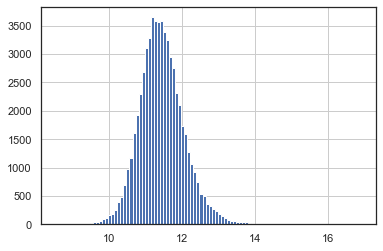

In [28]:
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);

以上より、以下のような特徴量を追加する
- var38mc == 1（var38==最頻値の場合）
- var38mc == 0（var38==最頻値以外の場合）


- logvar38 == 0（var38==最頻値の場合）
- logvar38 == log(var38) (var38==最頻値以外の場合)

In [29]:
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

欠損値の確認

In [30]:
print('Number of nan in var38mc', train['var38mc'].isnull().sum())
print('Number of nan in logvar38',train['logvar38'].isnull().sum())

Number of nan in var38mc 0
Number of nan in logvar38 0


## var15 : 顧客の年齢
The most important feature for XGBoost is var15. According to [a Kaggle form post](https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19291/data-dictionary/110414#post110414) var15 is the age of the customer. Let's explore var15

In [31]:
train['var15'].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

ヒストグラム

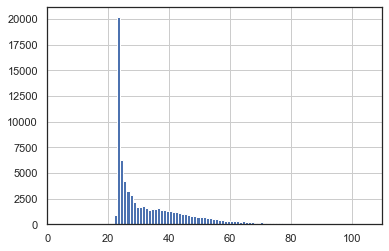

In [32]:
train['var15'].hist(bins=100);

満足/不満足で分けてカーネル密度推定のグラフを描画

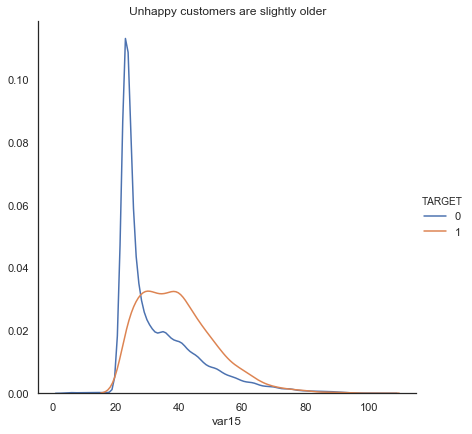

In [33]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Unhappy customers are slightly older');

## saldo_var30

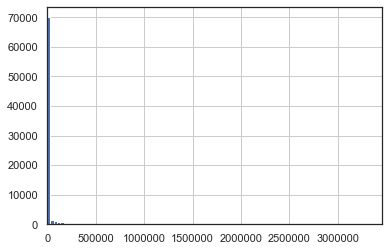

In [37]:
train.saldo_var30.hist(bins=100)
plt.xlim(0, train.saldo_var30.max());

In [38]:
train['log_saldo_var30'] = train.saldo_var30.map(np.log)

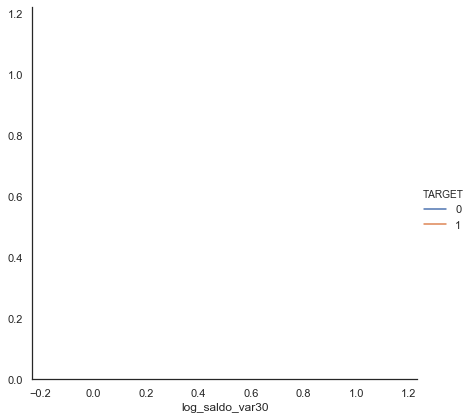

In [39]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "log_saldo_var30") \
   .add_legend();

## Explore the interaction between var15 (age) and var38

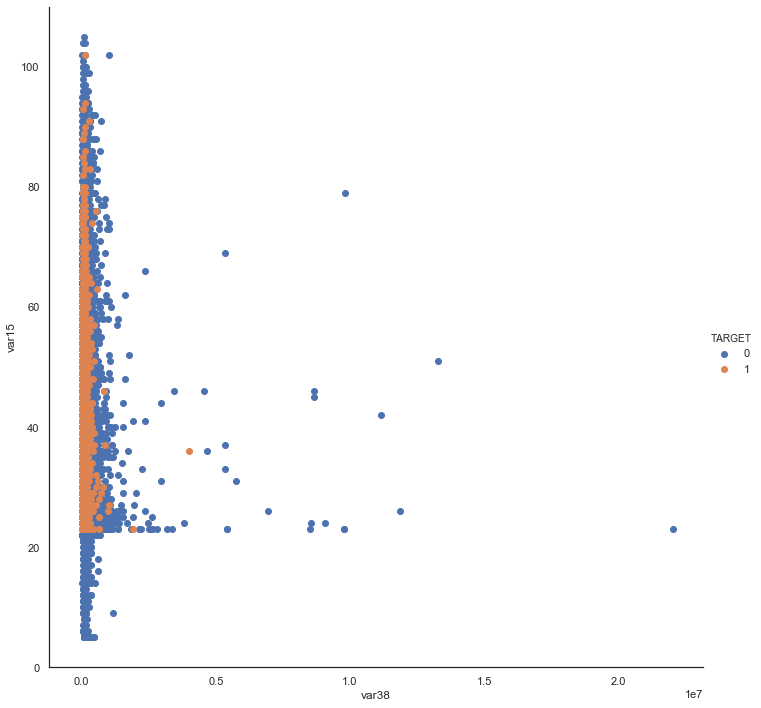

In [40]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "var38", "var15") \
   .add_legend()

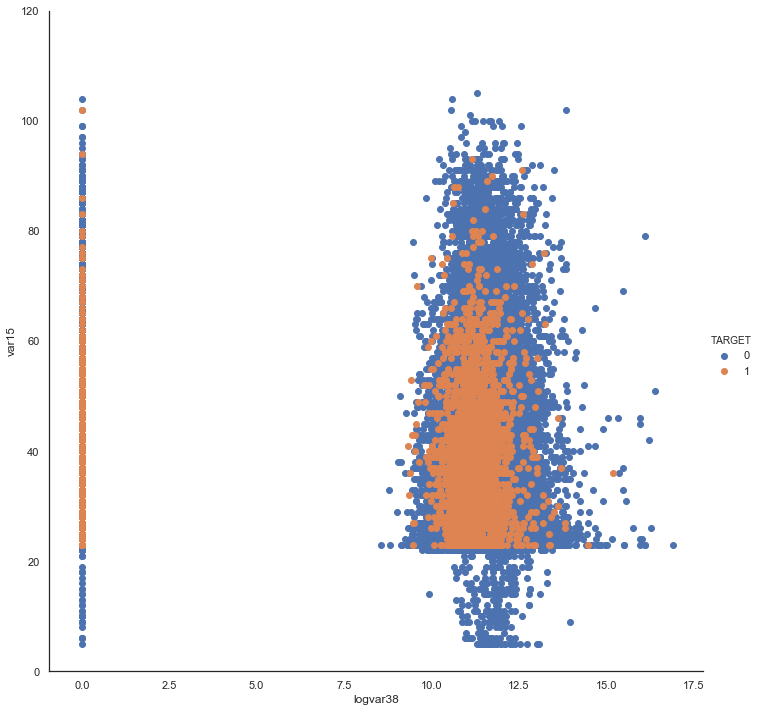

In [41]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15") \
   .add_legend()
plt.ylim([0,120]); # Age must be positive ;-)

var38==最頻値を取り除く

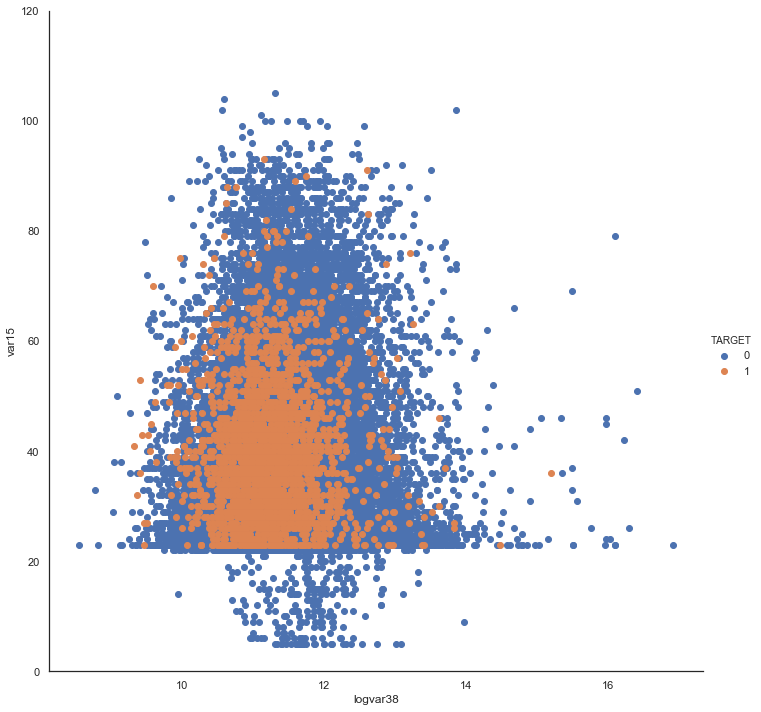

In [42]:
sns.FacetGrid(train[~train.var38mc], hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15") \
   .add_legend()
plt.ylim([0,120]);

var38==最頻値における年齢の分布

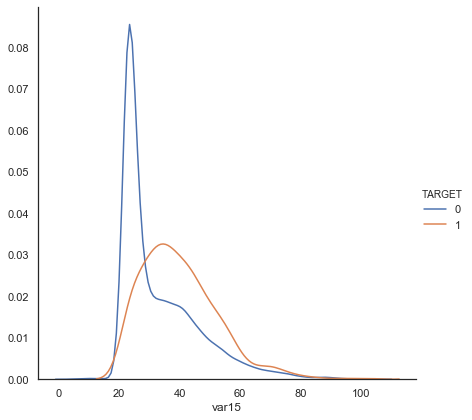

In [43]:
sns.FacetGrid(train[train.var38mc], hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend();

行のゼロの数の分布

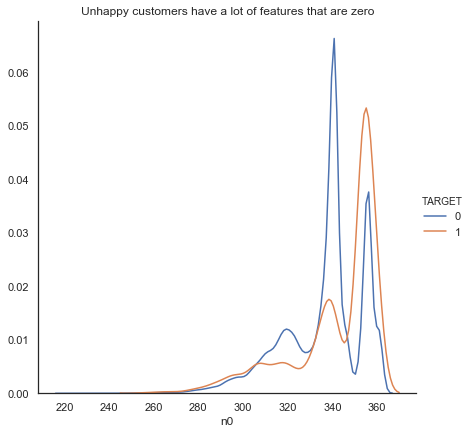

In [46]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "n0") \
   .add_legend()
plt.title('Unhappy customers have a lot of features that are zero');

TARGET==1(不満足な顧客)は特徴量に多くの0の値を持つ

## var36

In [49]:
X_sel['var36'].value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

var36は99か[0,1,2,3]

満足/不満足で分けてカーネル密度推定のグラフを描画

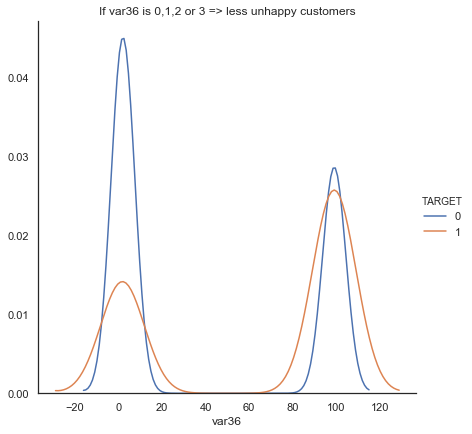

In [50]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var36") \
   .add_legend()
plt.title('If var36 is 0,1,2 or 3 => less unhappy customers');

var36==[0,1,2,3]のとき、TARGET==1(不満足な顧客)は少ない

var36 in function of var38 (most common value excluded)

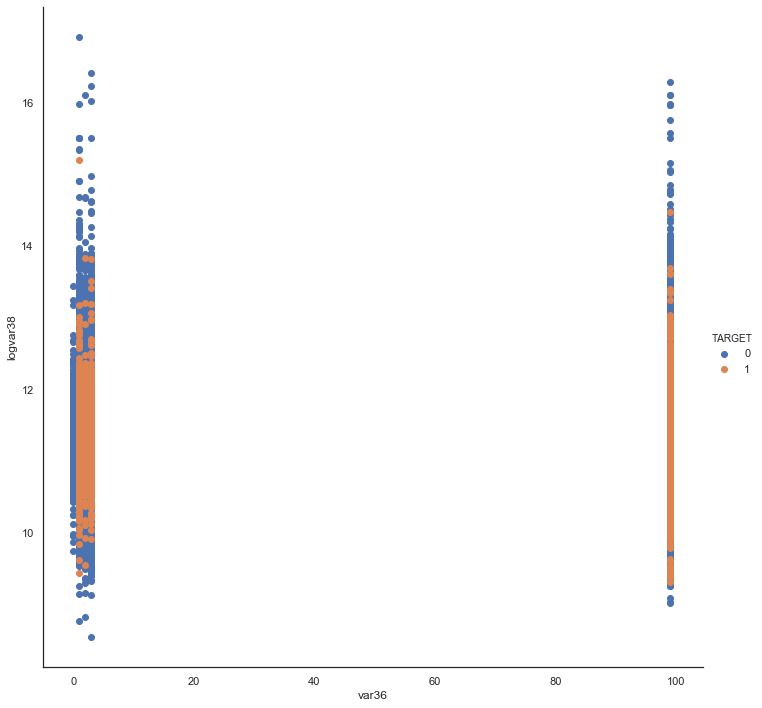

In [52]:
sns.FacetGrid(train[~train.var38mc], hue="TARGET", size=10) \
   .map(plt.scatter, "var36", "logvar38") \
   .add_legend();

var36==[0,1,2,3]に絞る

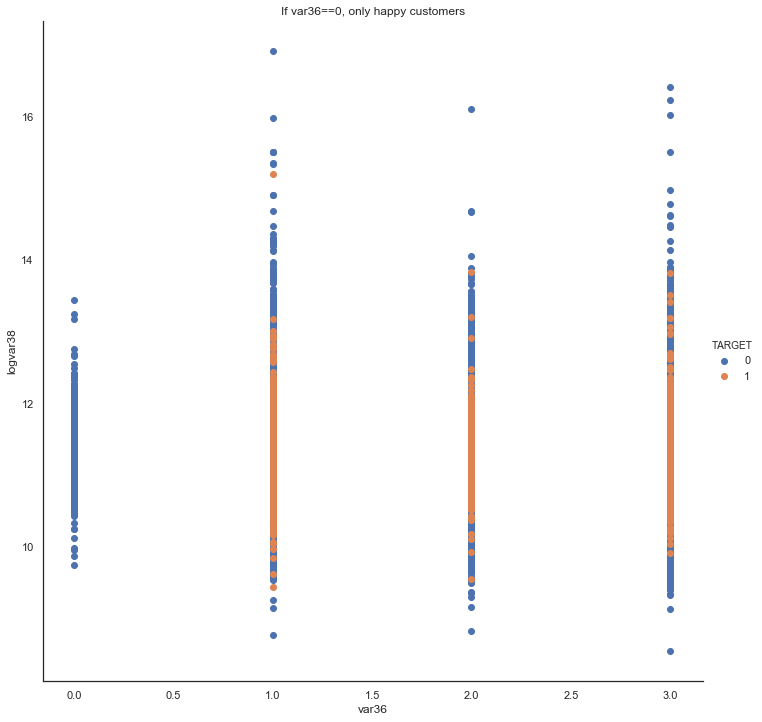

In [53]:
sns.FacetGrid(train[(~train.var38mc) & (train.var36 < 4)], hue="TARGET", size=10) \
   .map(plt.scatter, "var36", "logvar38") \
   .add_legend()
plt.title('If var36==0, only happy customers');

var36=99を満足/不満足で分けてカーネル密度推定のグラフを描画

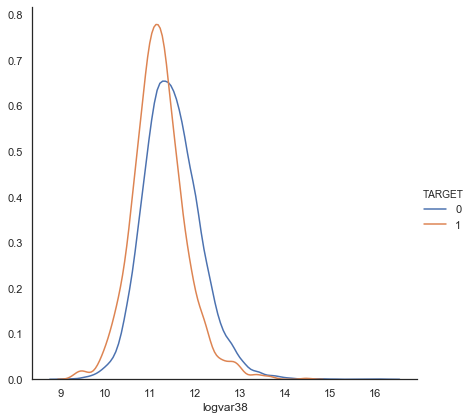

In [54]:
sns.FacetGrid(train[(~train.var38mc) & (train.var36 ==99)], hue="TARGET", size=6) \
   .map(sns.kdeplot, "logvar38") \
   .add_legend();

## num_var5

In [56]:
train.num_var5.value_counts()

3     50265
0     25561
6       190
9         3
15        1
Name: num_var5, dtype: int64

In [57]:
train[train.TARGET==1].num_var5.value_counts()

0    1959
3    1042
6       7
Name: num_var5, dtype: int64

In [58]:
train[train.TARGET==0].num_var5.value_counts()

3     49223
0     23602
6       183
9         3
15        1
Name: num_var5, dtype: int64

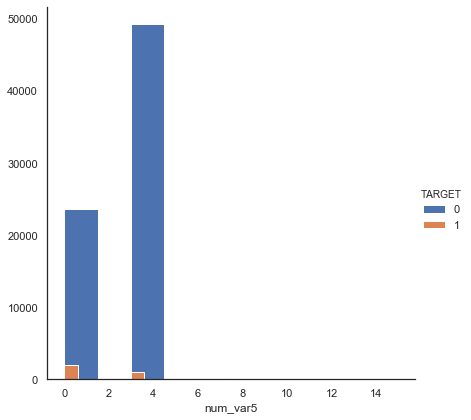

In [59]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var5") \
   .add_legend();

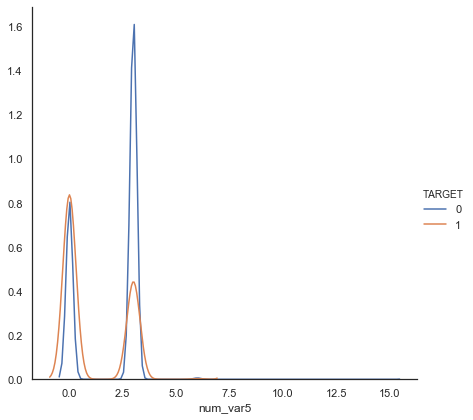

In [60]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "num_var5") \
   .add_legend();

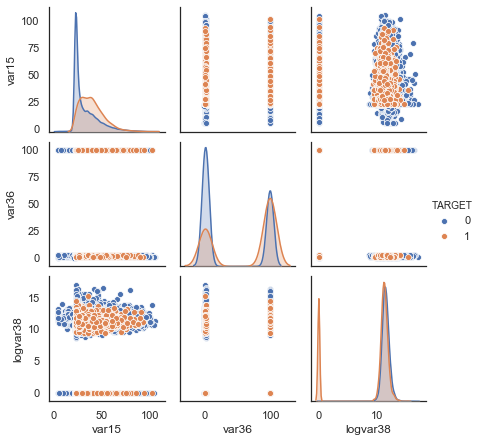

In [61]:
sns.pairplot(train[['var15','var36','logvar38','TARGET']], hue="TARGET", size=2, diag_kind="kde");

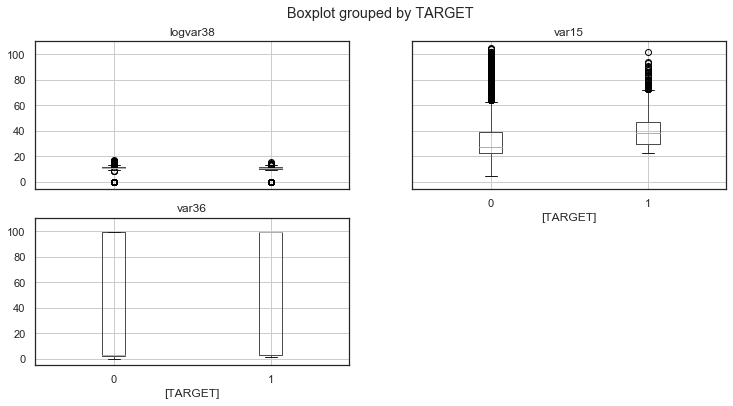

In [62]:
train[['var15','var36','logvar38','TARGET']].boxplot(by="TARGET", figsize=(12, 6));

Radvizは、N次元データセットを2D平面に視覚化する方法。各次元の影響をすべての次元の重要性のバランスとして解釈できる。

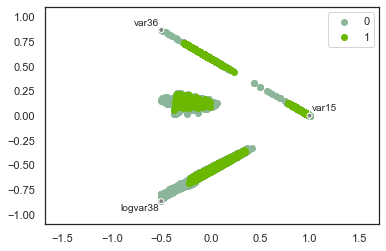

In [65]:
from pandas.plotting import radviz
radviz(train[['var15','var36','logvar38','TARGET']], "TARGET")

## 重要な特徴量を選ぶ
chi2とf_classifの双方に選択された特徴量を抽出

In [70]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

# First select features based on chi2 and f_classif
p = 3

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)

chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),
   chi2_selected_features))
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),
   f_classif_selected_features))
selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

Chi2 selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3', 'TARGET'].
F_classif selected 12 features ['var15', 'ind_var5', 'ind_var30', 'num_var4', 'num_var5', 'num_var30', 'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3', 'TARGET', 'n0'].
Chi2 & F_classif selected 9 features
['var15', 'ind_var5', 'ind_var30', 'num_var5', 'num_var30', 'num_var42', 'var36', 'num_meses_var5_ult3', 'TARGET']


In [48]:
# Make a dataframe with the selected features and the target variable
X_sel = train[features+['TARGET']]

## chi2とf_classifで選択した特徴量を見ていく

In [72]:
features

['var15',
 'ind_var5',
 'ind_var30',
 'num_var5',
 'num_var30',
 'num_var42',
 'var36',
 'num_meses_var5_ult3',
 'TARGET']

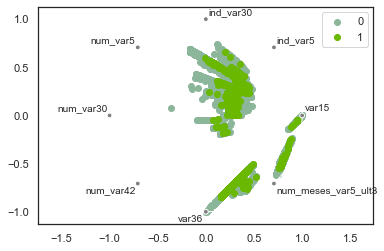

In [71]:
radviz(train[features], "TARGET");

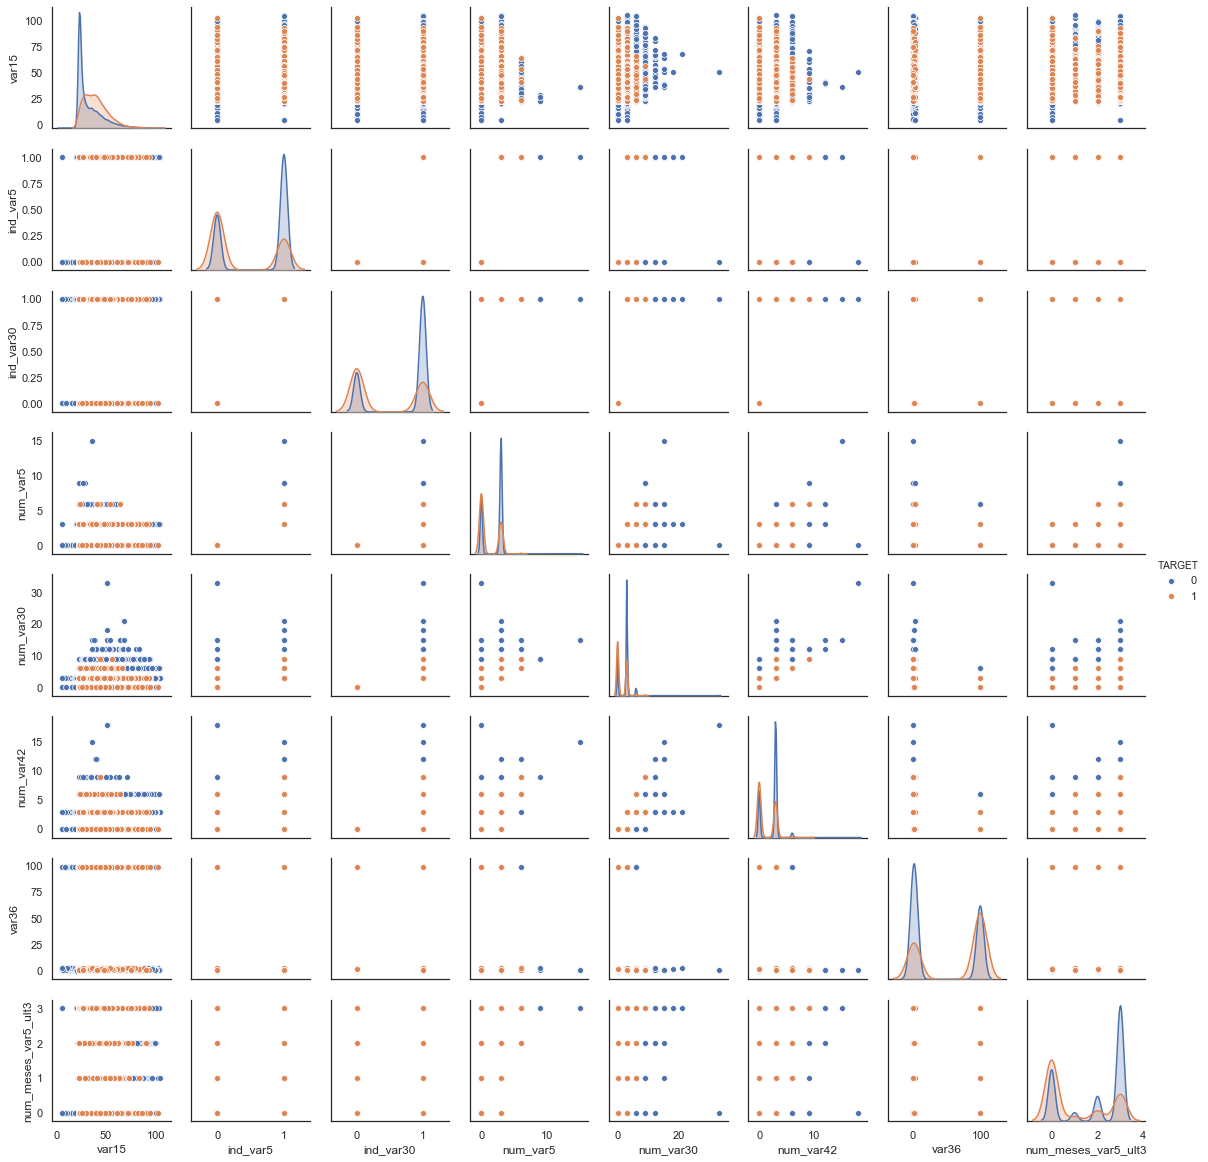

In [74]:
sns.pairplot(train[features], hue="TARGET", size=2, diag_kind="kde")

# 相関

In [75]:
cor_mat = X.corr()

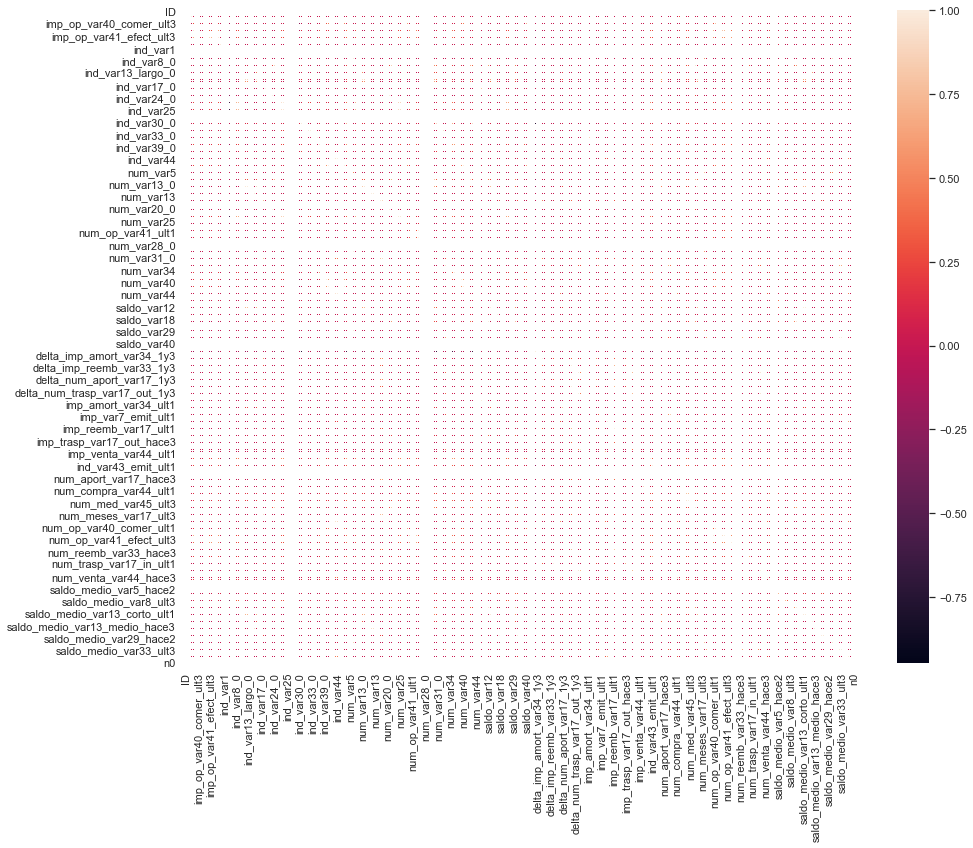

In [76]:
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

chi2とf_classifで選択した特徴量の相関係数をヒートマップ化

In [77]:
cor_mat = X_sel.corr()

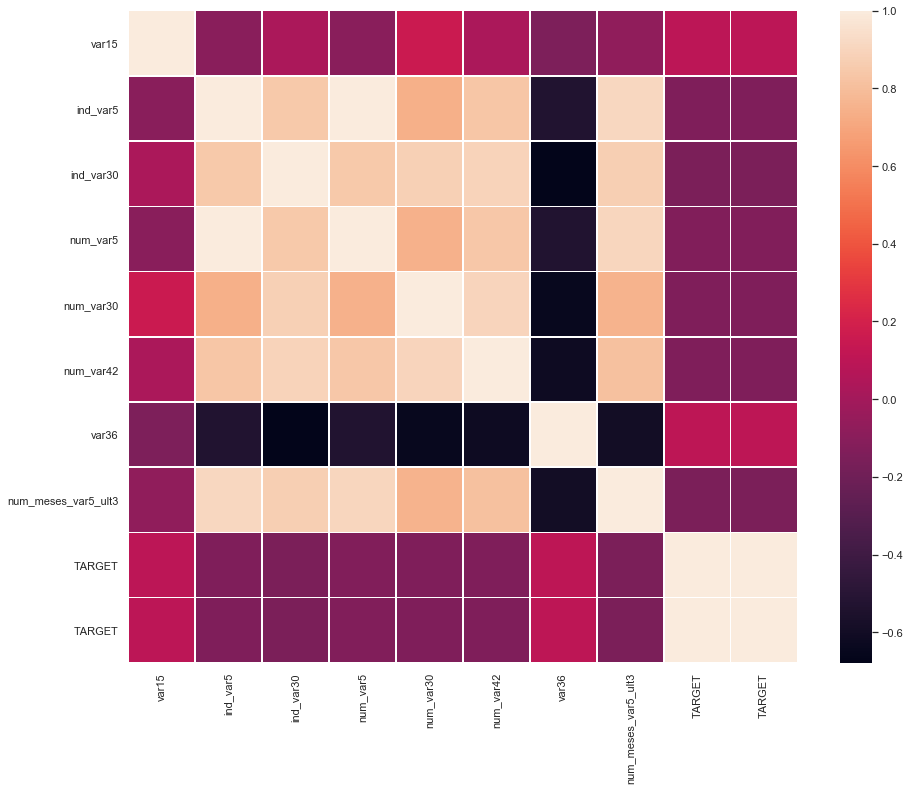

In [78]:
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

In [80]:
#自己相関ではなく、重要な相関のみ
threshold = 0.7
important_corrs = (cor_mat[abs(cor_mat) > threshold][cor_mat != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
#絶対値でソート
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
7,"(ind_var5, num_var5)",0.993709
6,"(ind_var5, num_meses_var5_ult3)",0.908842
3,"(num_meses_var5_ult3, num_var5)",0.903272
1,"(num_var30, num_var42)",0.898119
5,"(ind_var30, num_var42)",0.894182
13,"(ind_var30, num_var30)",0.875812
2,"(ind_var30, num_meses_var5_ult3)",0.869045
14,"(ind_var30, ind_var5)",0.848338
9,"(ind_var30, num_var5)",0.843001
10,"(num_var42, num_var5)",0.839574


## chi2とf_classifで選択した特徴量をクラスタリング

In [81]:
import matplotlib.patches as patches
from scipy.cluster import hierarchy
from scipy.stats.mstats import mquantiles
from scipy.cluster.hierarchy import dendrogram, linkage

データを相互に関連付けて、つながりを事前に計算する。これにより、事前に階層的なしきい値を取得できる。

seaborn.clustermapは入力された二次元データフレームを行と列それぞれでクラスタリングし、近いクラスタ同士を近い場所に配置するよう並べ替えを行った後heatmap+デンドログラム(樹形図)として可視化することができる関数。

In [83]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#標準化
train_std = pd.DataFrame(scale(X_sel))
train_std.columns = X_sel.columns
m = train_std.corr()
l = linkage(m, 'ward')

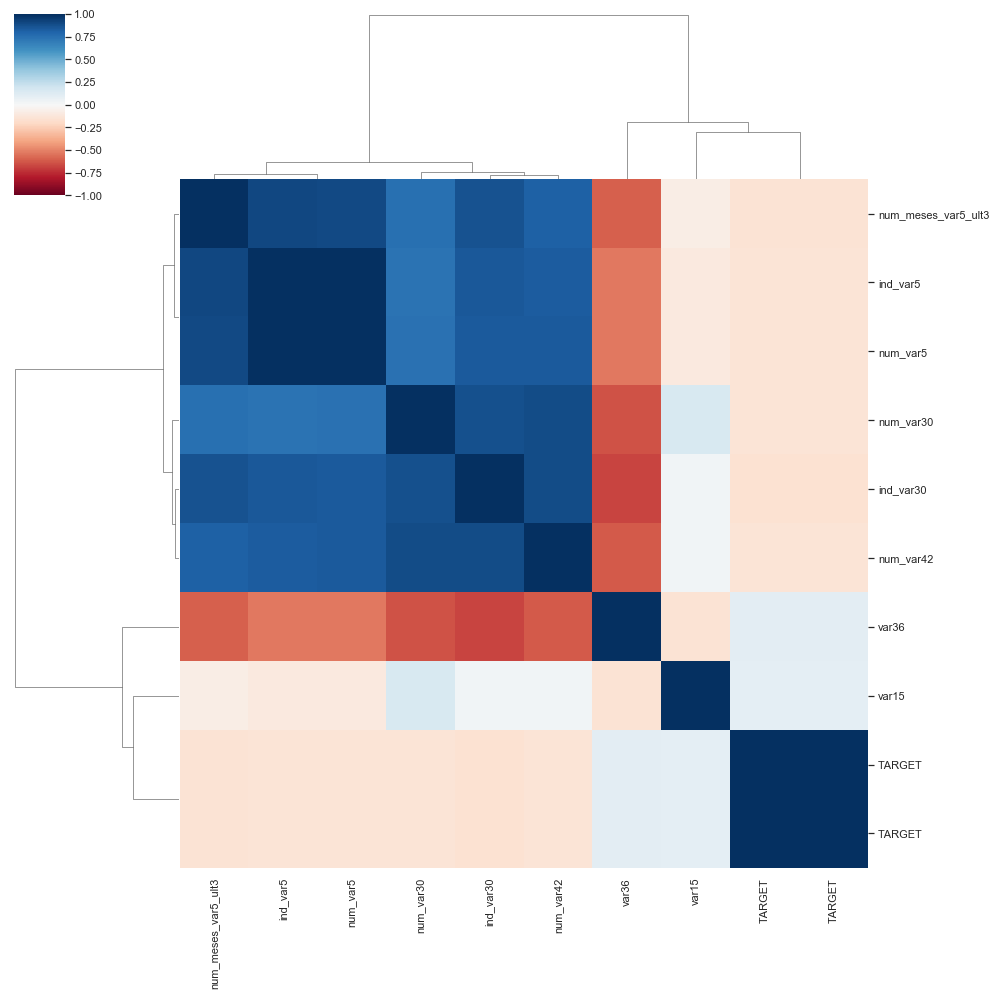

In [84]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(14, 14),
               row_linkage=l,
               col_linkage=l)

In [85]:
#しきい値1：scipyによって計算された距離しきい値の中央値
t = np.median(hierarchy.maxdists(l))

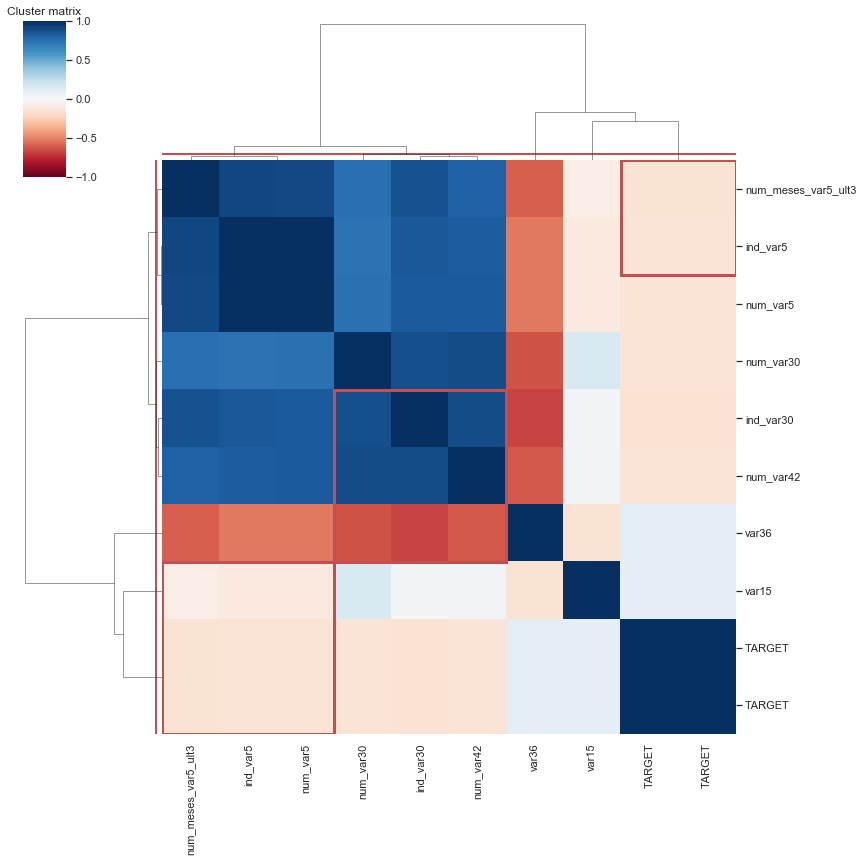

In [86]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(12, 12),
               row_linkage=l,
               col_linkage=l)

# 閾値の線を描く
mclust.ax_col_dendrogram.hlines(t,
                               0,
                               m.shape[0]*10,
                               colors='r',
                               linewidths=2,
                               zorder=1)
mclust.ax_row_dendrogram.vlines(t,
                               0,
                               m.shape[0]*10,
                               colors='r',
                               linewidths=2,
                               zorder=1)

# クラスターを抽出する
clusters = hierarchy.fcluster(l, t, 'distance')
for c in set(clusters):
    # クラスター化された行列の位置を取得する
    index = [x for x in range(m.shape[0])
             if mclust.data2d.columns[x] in m.index[clusters == c]]
    # No singletons, please
    if len(index) == 1:
        continue

# クラスターの周りに長方形を描く
    mclust.ax_heatmap.add_patch(
        patches.Rectangle(
            (min(index),
             m.shape[0] - max(index) - 1),
                len(index),
                len(index),
                facecolor='none',
                edgecolor='r',
                lw=3)
        )

plt.title('Cluster matrix')

pass